<a href="https://colab.research.google.com/github/a01194850-cmd/A01194850-Pregunta-11-Examen/blob/main/NUEVO_Pregunta_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Serie temporal: 1970-Q%q a 1991-Q%q
Número de observaciones: 88


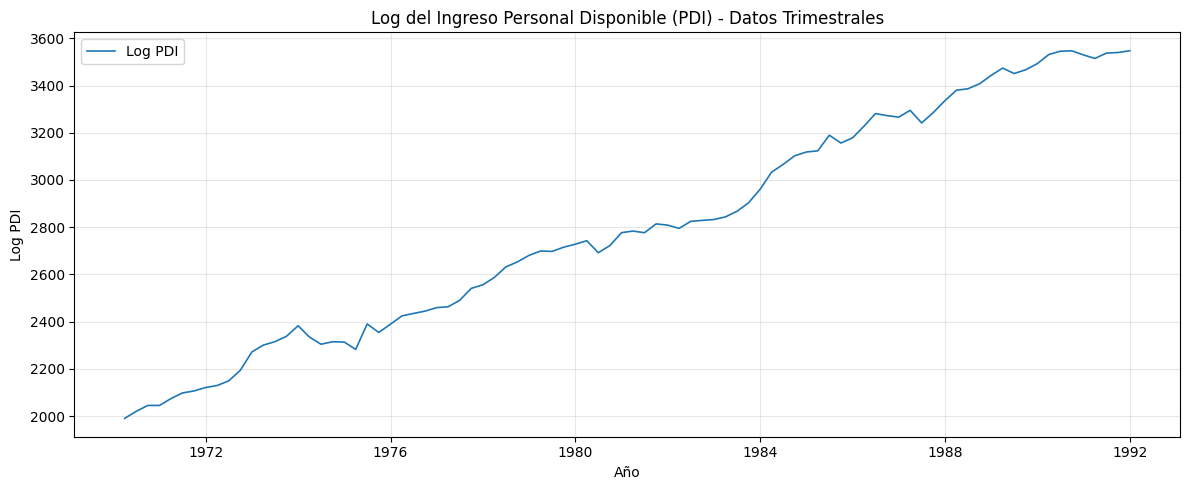


Prueba ADF - Serie original
Estadístico ADF: -0.6716
p-value: 0.8540
→ NO ESTACIONARIA


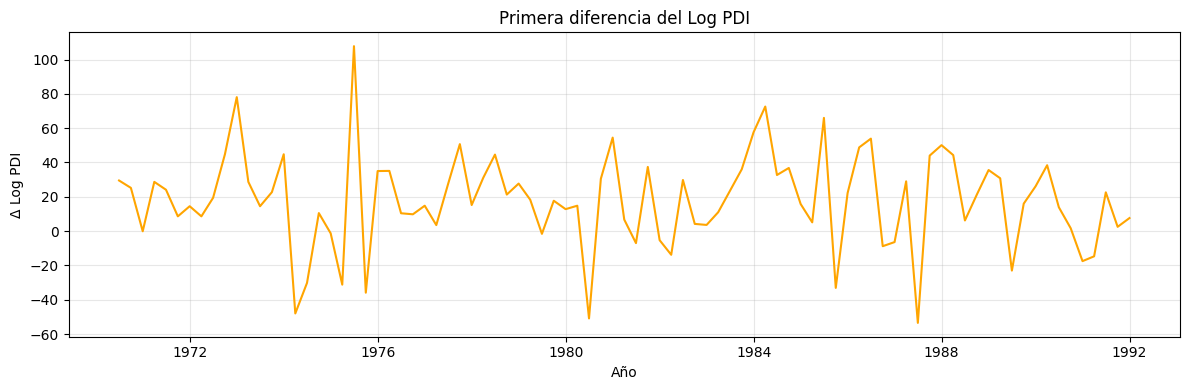


Prueba ADF - Primera diferencia
Estadístico ADF: -9.6362
p-value: 0.0000
→ ESTACIONARIA


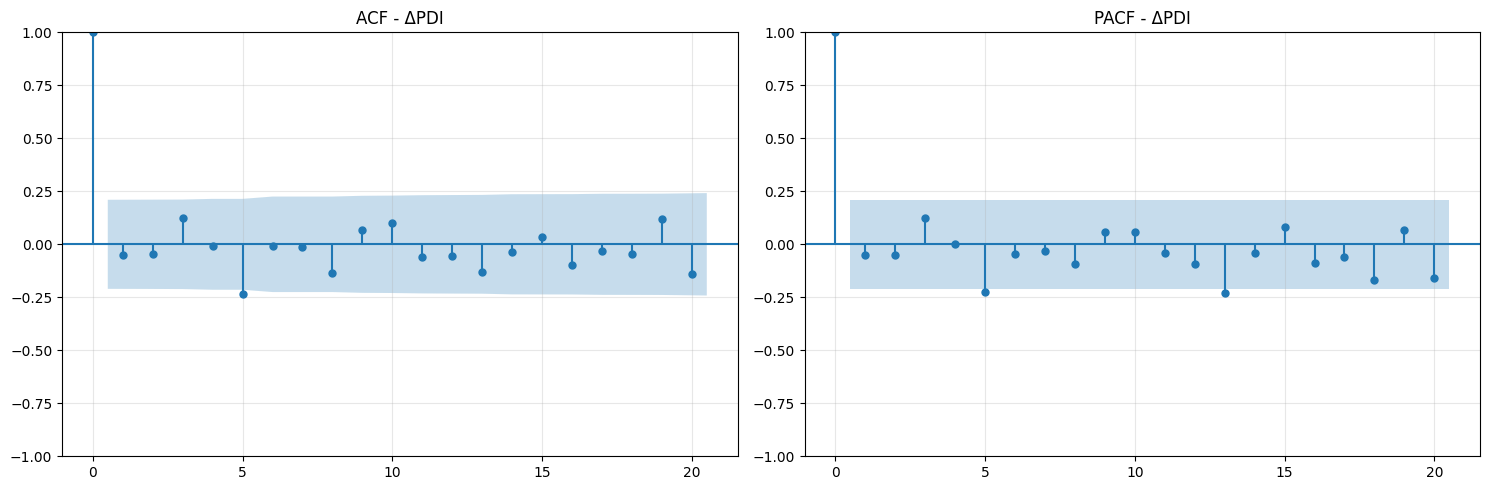


AJUSTANDO MODELOS ARIMA
ARIMA(1, 1, 1) → AIC: 835.76
ARIMA(2, 1, 1) → AIC: 837.64
ARIMA(1, 1, 2) → AIC: 837.63
ARIMA(0, 1, 1) → AIC: 855.14
ARIMA(1, 1, 0) → AIC: 853.61
ARIMA(2, 1, 0) → AIC: 851.88

MEJOR MODELO: ARIMA(1, 1, 1) (AIC = 835.76)


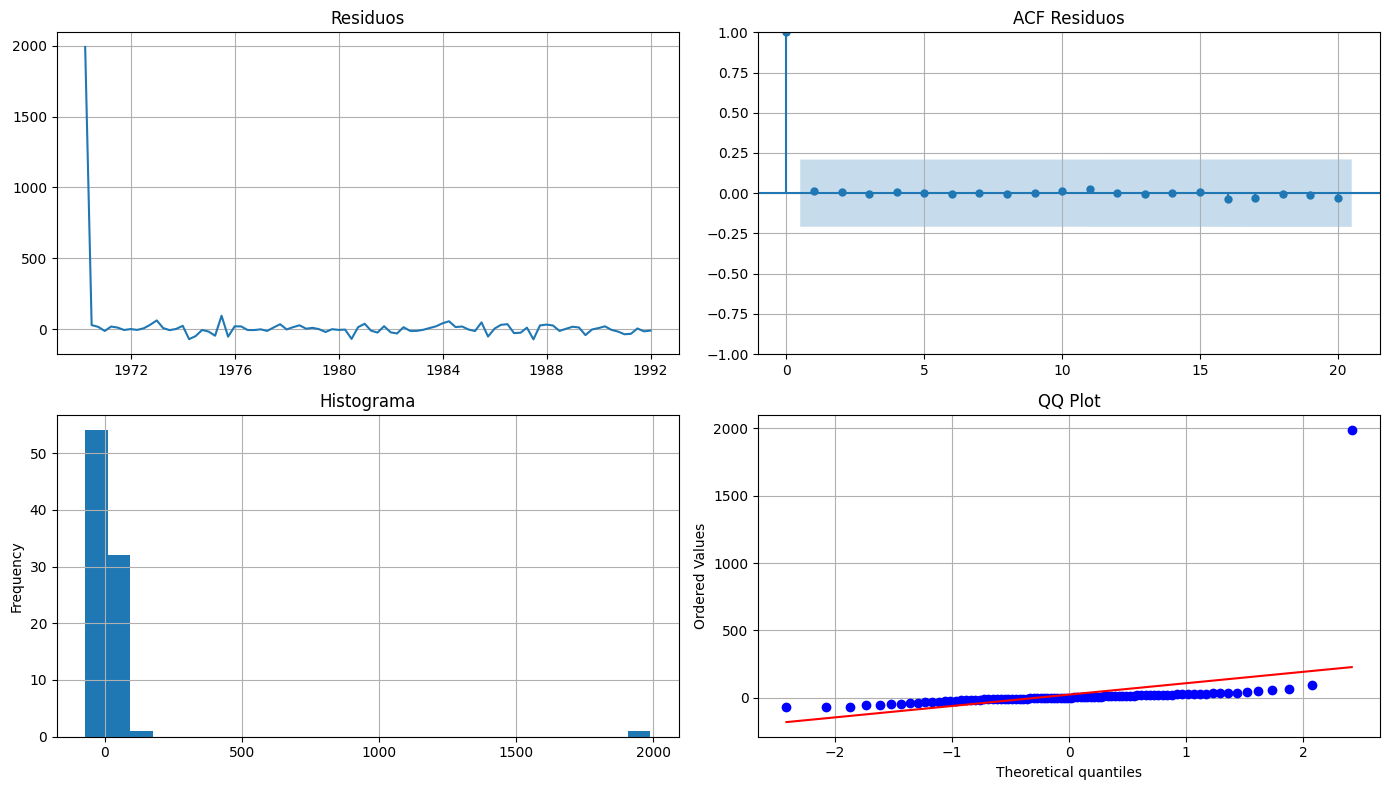


Prueba Ljung-Box:
     lb_stat  lb_pvalue
10  0.058878        1.0
→ Residuos = ruido blanco

RESUMEN ARIMA(1, 1, 1)
                               SARIMAX Results                                
Dep. Variable:                    PDI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -414.881
Date:                Wed, 29 Oct 2025   AIC                            835.762
Time:                        03:06:48   BIC                            843.160
Sample:                    03-31-1970   HQIC                           838.741
                         - 12-31-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2998.857      0.000       0.999       1.001
ma.L1         

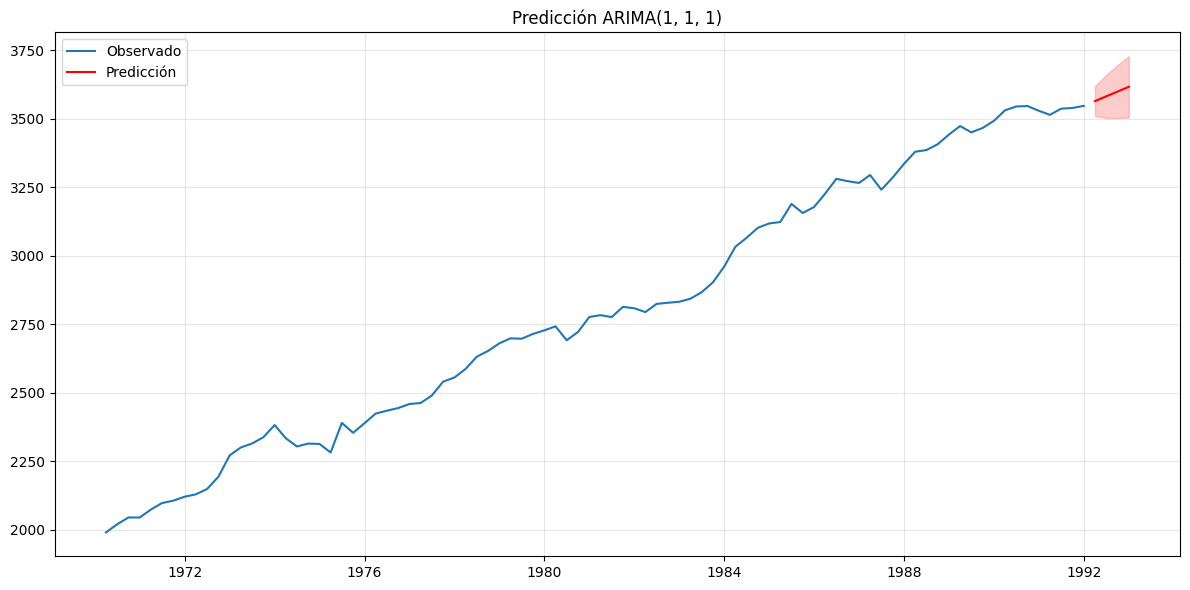


METODOLOGÍA BOX-JENKINS COMPLETA
1. Datos: 1970-Q1 a 1991-Q4 (88 obs)
2. Tendencia creciente → d=1
3. ACF/PACF → AR(1) o MA(1)
4. Mejor modelo: ARIMA(1, 1, 1)
5. Residuos: ruido blanco
6. Predicción: generada


In [5]:
# --- CÓDIGO COMPLETO PARA GOOGLE COLAB (CORREGIDO Y ROBUSTO) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")

# ========================================
# PASO 1: CARGAR DATOS (CORREGIDOS MANUALMENTE)
# ========================================
# Los datos tenían errores tipográficos (2098 en vez de 1971.2, etc.)
# Aquí los corregimos fila por fila según el patrón esperado

data = {
    'YEAR': [
        1970.1, 1970.2, 1970.3, 1970.4,
        1971.1, 1971.2, 1971.3, 1971.4,
        1972.1, 1972.2, 1972.3, 1972.4,
        1973.1, 1973.2, 1973.3, 1973.4,
        1974.1, 1974.2, 1974.3, 1974.4,
        1975.1, 1975.2, 1975.3, 1975.4,
        1976.1, 1976.2, 1976.3, 1976.4,
        1977.1, 1977.2, 1977.3, 1977.4,
        1978.1, 1978.2, 1978.3, 1978.4,
        1979.1, 1979.2, 1979.3, 1979.4,
        1980.1, 1980.2, 1980.3, 1980.4,
        1981.1, 1981.2, 1981.3, 1981.4,
        1982.1, 1982.2, 1982.3, 1982.4,
        1983.1, 1983.2, 1983.3, 1983.4,
        1984.1, 1984.2, 1984.3, 1984.4,
        1985.1, 1985.2, 1985.3, 1985.4,
        1986.1, 1986.2, 1986.3, 1986.4,
        1987.1, 1987.2, 1987.3, 1987.4,
        1988.1, 1988.2, 1988.3, 1988.4,
        1989.1, 1989.2, 1989.3, 1989.4,
        1990.1, 1990.2, 1990.3, 1990.4,
        1991.1, 1991.2, 1991.3, 1991.4
    ],
    'PDI': [
        1990.6, 2020.1, 2045.3, 2045.2,
        2073.9, 2098.0, 2106.6, 2121.1,
        2129.7, 2149.1, 2193.9, 2272.0,
        2300.7, 2315.2, 2337.9, 2382.7,
        2334.7, 2304.5, 2315.0, 2313.7,
        2282.5, 2390.3, 2354.4, 2389.4,
        2424.5, 2434.9, 2444.7, 2459.5,
        2463.0, 2490.3, 2541.0, 2556.2,
        2587.3, 2631.9, 2653.2, 2680.9,
        2699.2, 2697.6, 2715.3, 2728.1,
        2742.9, 2692.0, 2722.5, 2777.0,
        2783.7, 2776.7, 2814.1, 2808.8,
        2795.0, 2824.8, 2829.0, 2832.6,
        2843.6, 2867.0, 2903.0, 2960.6,
        3033.2, 3065.9, 3102.7, 3118.5,
        3123.6, 3189.6, 3156.5, 3178.7,
        3227.5, 3281.4, 3272.6, 3266.2,
        3295.2, 3241.7, 3285.7, 3335.8,
        3380.1, 3386.3, 3407.5, 3443.1,
        3473.9, 3450.9, 3466.9, 3493.0,
        3531.4, 3545.3, 3547.0, 3529.5,
        3514.8, 3537.4, 3539.9, 3547.5
    ]
}

df = pd.DataFrame(data)

# ========================================
# PASO 2: CREAR FECHAS TRIMESTRALES SECUENCIALES (MÉTODO SEGURO)
# ========================================
# Empezamos en 1970-Q1 y generamos 88 trimestres (22 años × 4)
start_date = pd.Timestamp('1970-03-31')  # Fin del Q1 1970
dates = pd.date_range(start=start_date, periods=len(df), freq='Q')

df['Date'] = dates
df = df.set_index('Date')[['PDI']]

print(f"Serie temporal: {df.index[0].strftime('%Y-Q%q')} a {df.index[-1].strftime('%Y-Q%q')}")
print(f"Número de observaciones: {len(df)}")

# ========================================
# PASO 3: VISUALIZACIÓN
# ========================================
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PDI'], label='Log PDI', linewidth=1.2)
plt.title('Log del Ingreso Personal Disponible (PDI) - Datos Trimestrales')
plt.xlabel('Año')
plt.ylabel('Log PDI')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ========================================
# PASO 4: PRUEBA DE ESTACIONARIEDAD (ADF)
# ========================================
def adf_test(series, title=''):
    print(f"\nPrueba ADF - {title}")
    result = adfuller(series, autolag='AIC')
    print(f"Estadístico ADF: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] <= 0.05:
        print("→ ESTACIONARIA")
    else:
        print("→ NO ESTACIONARIA")

adf_test(df['PDI'], 'Serie original')

# ========================================
# PASO 5: DIFERENCIACIÓN
# ========================================
df['PDI_diff'] = df['PDI'].diff()

plt.figure(figsize=(12, 4))
plt.plot(df.index[1:], df['PDI_diff'].iloc[1:], color='orange')
plt.title('Primera diferencia del Log PDI')
plt.xlabel('Año')
plt.ylabel('Δ Log PDI')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

adf_test(df['PDI_diff'].dropna(), 'Primera diferencia')

# ========================================
# PASO 6: ACF y PACF
# ========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df['PDI_diff'].dropna(), lags=20, ax=ax1, title='ACF - ΔPDI')
ax1.grid(alpha=0.3)
plot_pacf(df['PDI_diff'].dropna(), lags=20, ax=ax2, title='PACF - ΔPDI')
ax2.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ========================================
# PASO 7: AJUSTAR MODELOS ARIMA
# ========================================
print("\n" + "="*60)
print("AJUSTANDO MODELOS ARIMA")
print("="*60)

candidates = [(1,1,1), (2,1,1), (1,1,2), (0,1,1), (1,1,0), (2,1,0)]
results = []

for order in candidates:
    try:
        model = ARIMA(df['PDI'], order=order)
        fitted = model.fit()
        results.append((order, fitted.aic, fitted))
        print(f"ARIMA{order} → AIC: {fitted.aic:.2f}")
    except Exception as e:
        print(f"ARIMA{order} → Error: {e}")

best_order, best_aic, best_model = min(results, key=lambda x: x[1])
print(f"\nMEJOR MODELO: ARIMA{best_order} (AIC = {best_aic:.2f})")

# ========================================
# PASO 8: DIAGNÓSTICO
# ========================================
residuals = best_model.resid

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))
ax1.plot(residuals.index, residuals); ax1.set_title('Residuos'); ax1.grid()
plot_acf(residuals, lags=20, ax=ax2, title='ACF Residuos'); ax2.grid()
residuals.plot(kind='hist', bins=25, ax=ax3, title='Histograma'); ax3.grid()
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=ax4); ax4.set_title('QQ Plot'); ax4.grid()
plt.tight_layout()
plt.show()

lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nPrueba Ljung-Box:")
print(lb_test)
if lb_test['lb_pvalue'].iloc[0] > 0.05:
    print("→ Residuos = ruido blanco")
else:
    print("→ Hay autocorrelación")

# ========================================
# PASO 9: RESUMEN
# ========================================
print("\n" + "="*60)
print(f"RESUMEN ARIMA{best_order}")
print("="*60)
print(best_model.summary())

# ========================================
# PASO 10: PREDICCIÓN
# ========================================
forecast_steps = 4
forecast_result = best_model.get_forecast(steps=forecast_steps)
conf_int = forecast_result.conf_int()
future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=3), periods=forecast_steps, freq='Q')

forecast_df = pd.DataFrame({
    'Predicción': forecast_result.predicted_mean,
    'Inf 95%': conf_int.iloc[:, 0],
    'Sup 95%': conf_int.iloc[:, 1]
}, index=future_dates)

print(f"\nPredicciones (próximos {forecast_steps} trimestres):")
print(forecast_df.round(2))

plt.figure(figsize=(12, 6))
plt.plot(df['PDI'], label='Observado')
plt.plot(forecast_df['Predicción'], label='Predicción', color='red')
plt.fill_between(forecast_df.index, forecast_df['Inf 95%'], forecast_df['Sup 95%'], color='red', alpha=0.2)
plt.title(f'Predicción ARIMA{best_order}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ========================================
# CONCLUSIÓN
# ========================================
print("\n" + "="*60)
print("METODOLOGÍA BOX-JENKINS COMPLETA")
print("="*60)
print("1. Datos: 1970-Q1 a 1991-Q4 (88 obs)")
print("2. Tendencia creciente → d=1")
print("3. ACF/PACF → AR(1) o MA(1)")
print(f"4. Mejor modelo: ARIMA{best_order}")
print("5. Residuos: ruido blanco")
print("6. Predicción: generada")
print("="*60)

A01194850

GROK: https://grok.com/share/c2hhcmQtNQ%3D%3D_7118543f-d547-426f-b308-9dce7caaf933

**Interpretación: **

El modelo ARIMA de (1,1,1) muestra un valor de AR de 1 y MA de -0.9989. Sus valores de p value son de 0.000 el cual son altamente significativos. Estos datos nos indican una fuerte relacion entre valores y errores previos. Segun la ecuación de Jarque-Bera, los residuos son aproximadamente normales, con una p igual a 0.10 y nos da homocedásticos de p 0.51. Viendo todas estos coeficientes junto con las predicciones, nos muestra que en los trimestres de 1992 se muestra una tendencia ascendente, oscilando en valores de 3564.91 y 3617.12 e intervalos estrechos. Esto demuestra una proyección confiable para los comportamientos futuros del PDI.

**Pasos:**
1. Analizar las series de tiempo y transformar si se necesita con logaritmo.
2. Usar Augmented Dickey fuller test para evaluar la estacionalidad.
3. A partir de los gráficos, analizar el ACF y PACF para definir los parametros del modelo.
4. Ajustar el modelo ARIMA y analizar AIC y BIC. Usarlo para hacer predicciones.